In [1]:
"""
Topic:    ED I HW 7 
Author:   Yuan-Yen Peng 
Liscence: MIT 
Date:     Jan. 11, 2024
"""


import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use("ATLAS")

prob 1

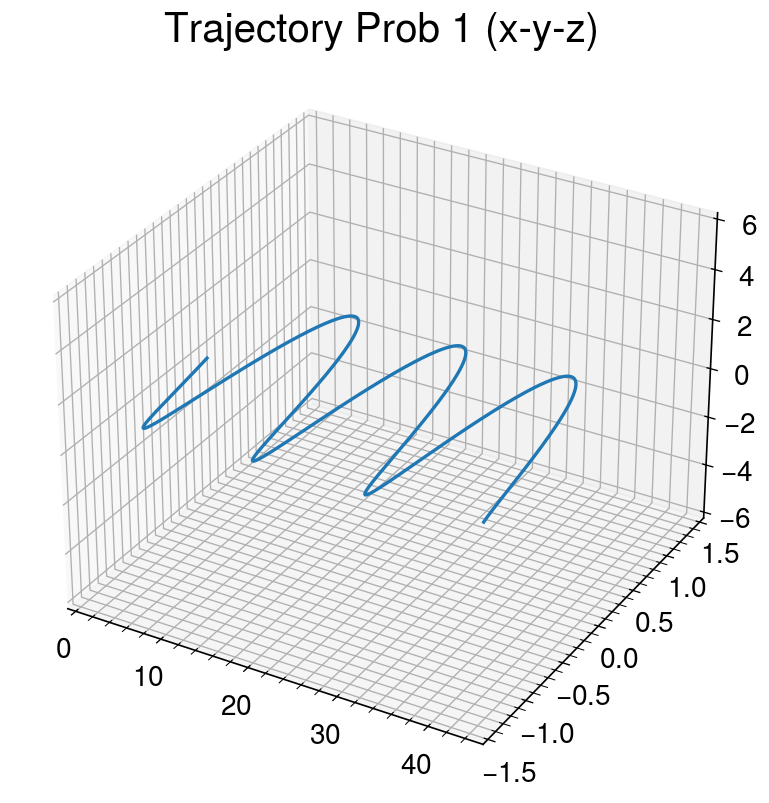

In [2]:
# experimental paramters
E0 = 2
B0 = 1
v0 = 1
m = 1
q = 1

# high-level parameters
omega = q * B0 / m
vd = E0 / B0

# Boundary conditions
x0, y0 = v0 / omega, 0

# position variables
t = np.linspace(0, 20, 1000)
x = (v0 / omega) * np.cos(omega * t) + vd * t
y = -(v0 / omega) * np.sin(omega * t)
z = np.zeros(len(t))

# Plot the trajectory
fig = plt.figure(figsize=(8, 8), dpi=120)
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z)
plt.title("Trajectory Prob 1 (x-y-z)")
plt.show()
plt.close()

prob 2

-0.04399357944297044 -0.050386159740055066


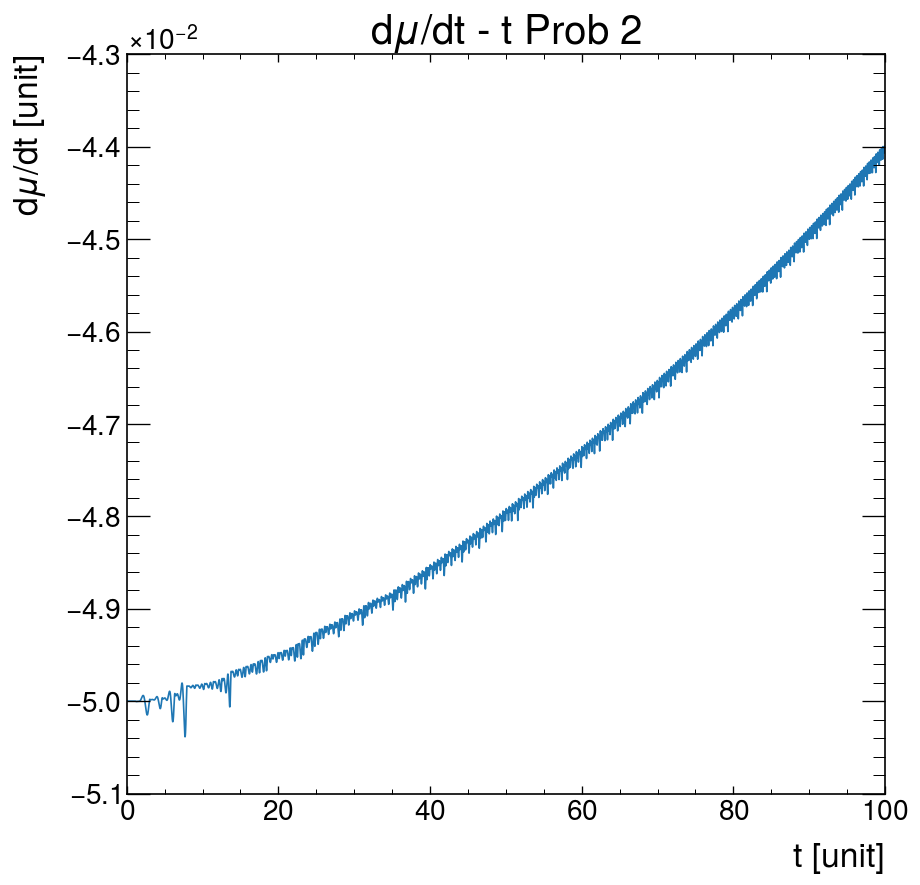

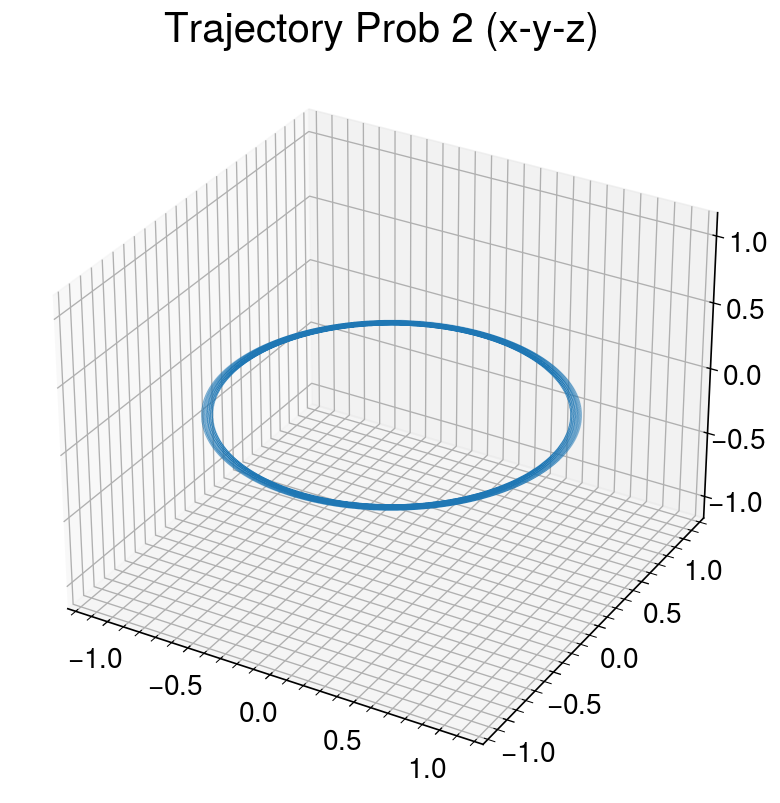

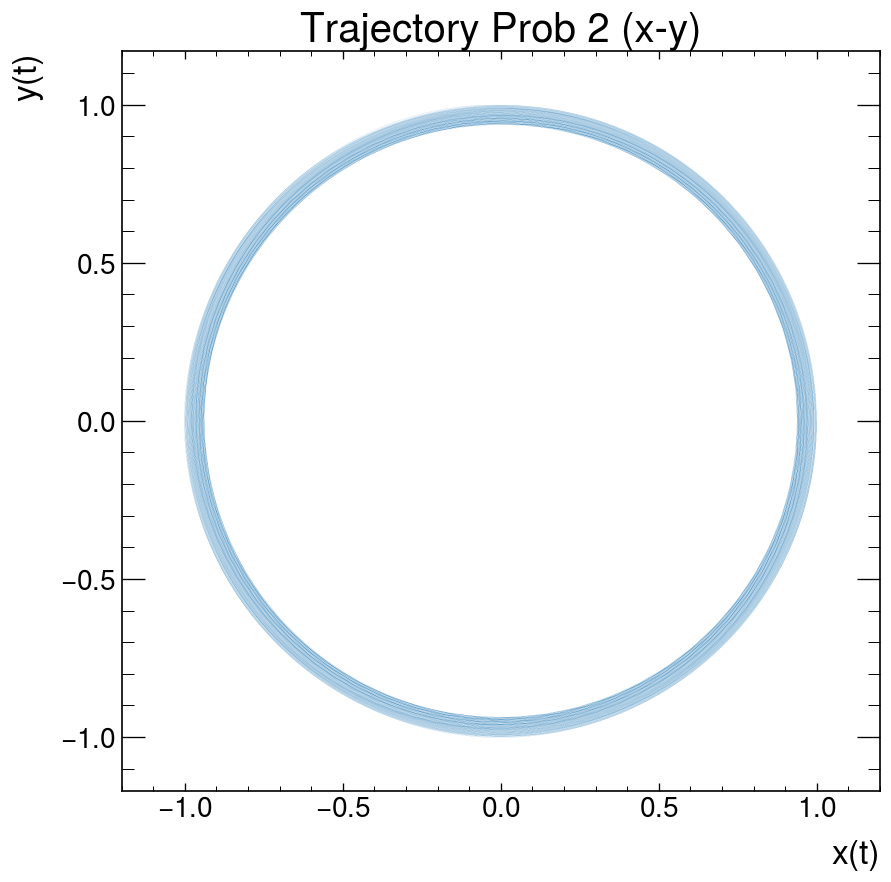

In [3]:
def odes(t, y0):
    x, y, z, vx, vy, vz = y0
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = vy * (1 + 0.1 * t) + 0.1 * y
    dvydt = -vx * (1 + 0.1 * t) - 0.1 * x
    dvzdt = 0
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]  # return derivatives


# BCs
pos = [1, 0, 0]
vel = [0, -1, 0]
y0 = [*pos, *vel]

# time steps
ti, tf = 0, 100
steps = 10000
t_span = (ti, tf)
t_eval = np.linspace(ti, tf, steps)

# ivp solver
sol = solve_ivp(
    odes, y0=y0, t_span=t_span, t_eval=t_eval, method="DOP853", dense_output=False
)

# extract solutions
x, y, z = sol.y[0], sol.y[1], sol.y[2]
t = sol.t
dmu = -0.05 * (np.square(sol.y[3]) + np.square(sol.y[4])) / np.square(0.1 * t + 1)
print(dmu.max(), dmu.min())
# plot
fig = plt.figure(figsize=(8, 8), dpi=120)
plt.plot(t, dmu, linewidth=1)
plt.title(r"d$\mu$/dt - t Prob 2")
# plt.ylim([0, 5.5])
plt.xlabel("t [unit]")
plt.ylabel(r"d$\mu$/dt [unit]")
plt.show()
plt.close()
fig = plt.figure(figsize=(8, 8), dpi=120)
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, linewidth=0.05)
plt.title("Trajectory Prob 2 (x-y-z)")
plt.axis("equal")
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.show()
plt.close()
fig = plt.figure(figsize=(8, 8), dpi=120)
plt.plot(x, y, linewidth=0.05)
plt.title("Trajectory Prob 2 (x-y)")
plt.axis("equal")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.show()
plt.close()

Prob 3

(7853,) (7853,) (7853,)
9.95414291523482


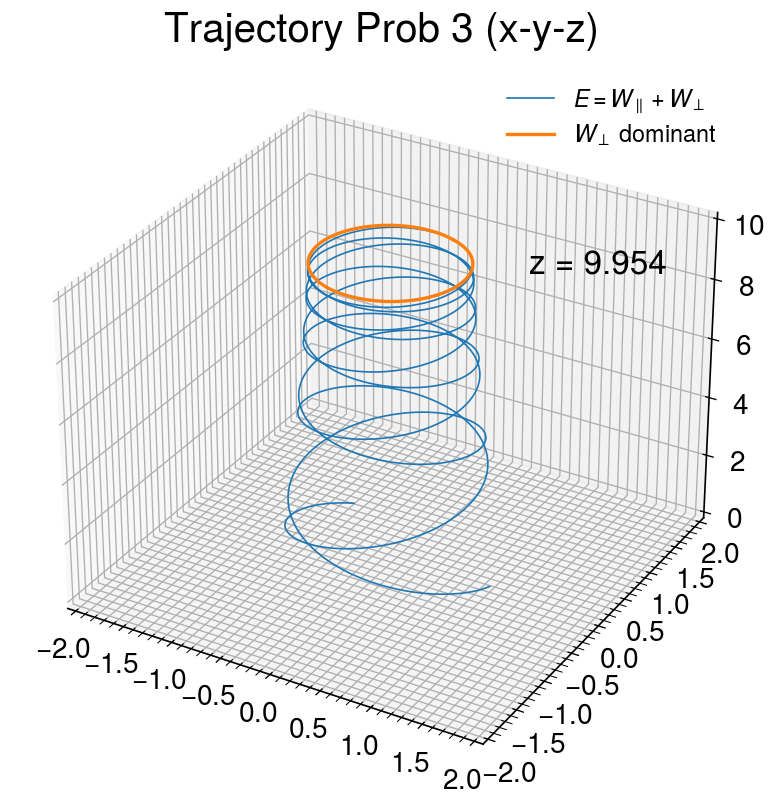

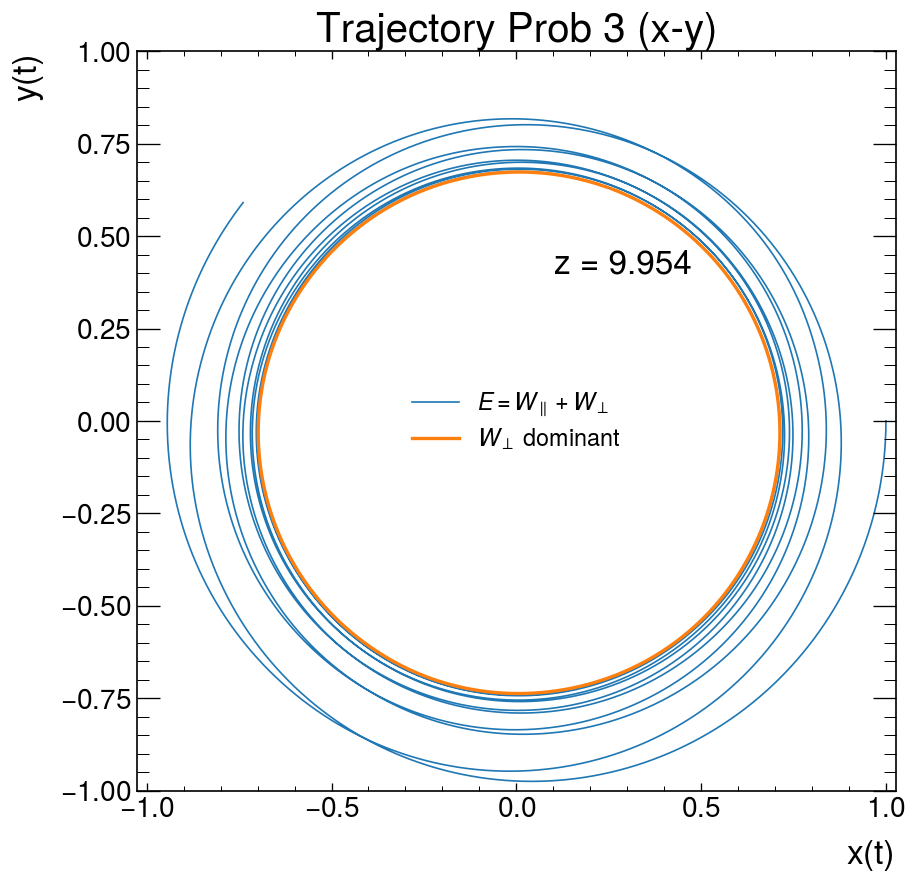

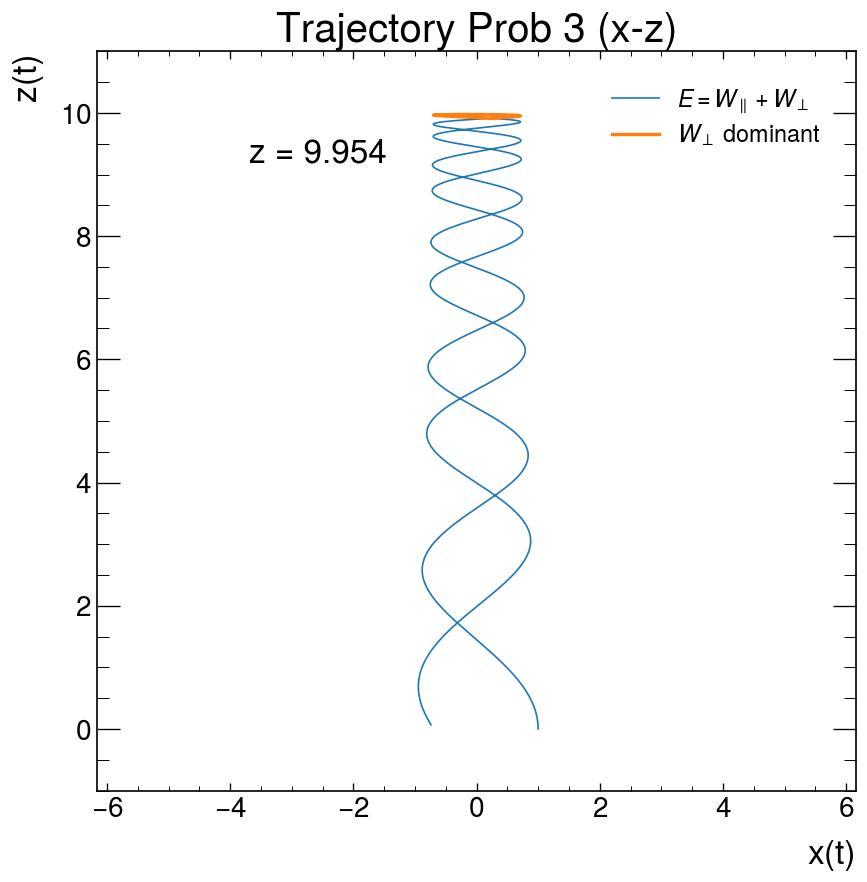

In [4]:
def odes(t, y0):
    x, y, z, vx, vy, vz = y0
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = vy * (1 + 0.1 * z) + vz * (0.5 * 0.1 * y)
    dvydt = -vx * (1 + 0.1 * z) - vz * (0.5 * 0.1 * x)
    dvzdt = -vx * (0.5 * 0.1 * y) + vy * (0.5 * 0.1 * x)
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]  # return derivatives


# BCs
pos = [1, 0, 0]
vel = [0, -1, 1]
y0 = [*pos, *vel]

# time steps
ti, tf = 0, 40
steps = int(1e5)
t_span = (ti, tf)
t_eval = np.linspace(ti, tf, steps)

# ivp solver
sol = solve_ivp(
    odes, y0=y0, t_span=t_span, t_eval=t_eval, method="DOP853", dense_output=False
)

# extract solutions
x, y, z = sol.y[0], sol.y[1], sol.y[2]
# Where W_perp dominant
tor = 0.078
cri_zz = np.abs(sol.y[-1]) < tor
xx = sol.y[0][cri_zz]
yy = sol.y[1][cri_zz]
zz = sol.y[2][cri_zz]
tt = sol.t[cri_zz]
dominant_z = np.average(zz)
print(xx.shape, yy.shape, zz.shape)
print(dominant_z)

# plot
fig = plt.figure(figsize=(8, 8), dpi=120)
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, linewidth=1, label=r"$E = W_{\parallel} + W_{\perp}$")
ax.plot(xx, yy, zz, linewidth=2, label=r"$W_{\perp}$ dominant")
plt.legend()
plt.title("Trajectory Prob 3 (x-y-z)")
ax.text2D(0.7, 0.7, f"z = {dominant_z:.3f}", transform=ax.transAxes, fontsize=20)
plt.axis("equal")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
plt.close()
fig = plt.figure(figsize=(8, 8), dpi=120)
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1, label=r"$E = W_{\parallel} + W_{\perp}$")
ax.plot(xx, yy, linewidth=2, label=r"$W_{\perp}$ dominant")
plt.legend()
plt.title("Trajectory Prob 3 (x-y)")
ax.text(0.55, 0.7, f"z = {dominant_z:.3f}", transform=ax.transAxes, fontsize=20)
plt.axis("equal")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()
plt.close()
fig = plt.figure(figsize=(8, 8), dpi=120)
ax = fig.add_subplot(111)
ax.plot(x, z, linewidth=1, label=r"$E = W_{\parallel} + W_{\perp}$")
ax.plot(xx, zz, linewidth=2, label=r"$W_{\perp}$ dominant")
plt.legend()
plt.title("Trajectory Prob 3 (x-z)")
ax.text(0.2, 0.85, f"z = {dominant_z:.3f}", transform=ax.transAxes, fontsize=20)
plt.axis("equal")
plt.xlabel("x(t)")
plt.ylabel("z(t)")
plt.xlim([-2, 2])
plt.ylim([-1, 11])
plt.show()
plt.close()